In [6]:
plant.df = PlantGrowth

In [7]:
summary(plant.df)

     weight       group   
 Min.   :3.590   ctrl:10  
 1st Qu.:4.550   trt1:10  
 Median :5.155   trt2:10  
 Mean   :5.073            
 3rd Qu.:5.530            
 Max.   :6.310            

In [8]:
plant.df$group = factor(plant.df$group,
                      labels =c("Control", "Treatment 1", "Treatment 2"))

In [9]:
require(ggplot2)

Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

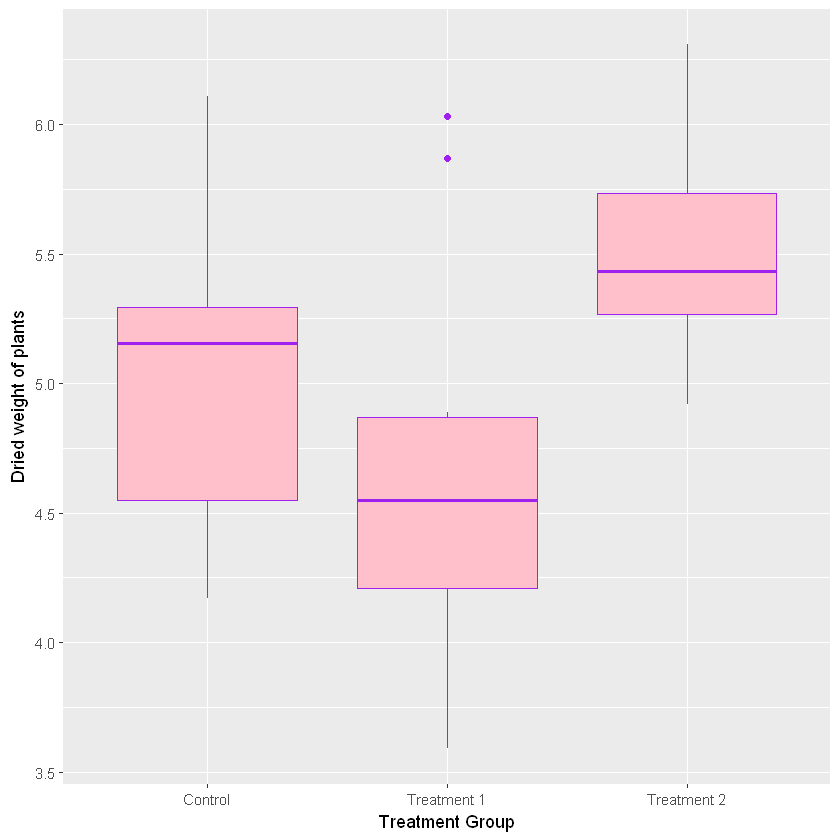

In [14]:
ggplot(plant.df, aes(x = group, y = weight)) +
  geom_boxplot(fill = "pink", colour = "purple") +
  scale_x_discrete() + xlab("Treatment Group") +
  ylab("Dried weight of plants")
#This is a boxplot of the dried weights for the three competing groups

In [ ]:
#We visually see that there are different, however using ANOVA we can quantify it.

In [15]:
plant.mod1 = lm(weight ~ group, data = plant.df)
summary(plant.mod1)


Call:
lm(formula = weight ~ group, data = plant.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.0320     0.1971  25.527   <2e-16 ***
groupTreatment 1  -0.3710     0.2788  -1.331   0.1944    
groupTreatment 2   0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


(Intercept) refers to the first group, which is the control group.
Under the Estimate column, we see the mean of the control group is 5.0320 and down the column is the differences of the control group's mean and the means of the test groups.
THis gives us specifice information about coeeficients.
Last column is a p-value for the difference of that mean from zero. Treatment 2 has a significant difference from the control group.

In [16]:
anova(plant.mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


Runs f test on the factor of the treatment we have a p value of .0159. Because this is a single factor model the p-value in anova matches the p-value in lm. THis p-value still shows that there are significant differences between the groups.

In [17]:
confint(plant.mod1)

,2.5 %,97.5 %
(Intercept),4.62752600,5.4364740
groupTreatment 1,-0.94301261,0.2010126
groupTreatment 2,-0.07801261,1.0660126


These are the confidence intervals from the logistic regression model

In [18]:
plant.mod = data.frame(Fitted = fitted(plant.mod1),
  Residuals = resid(plant.mod1), Treatment = plant.df$group)

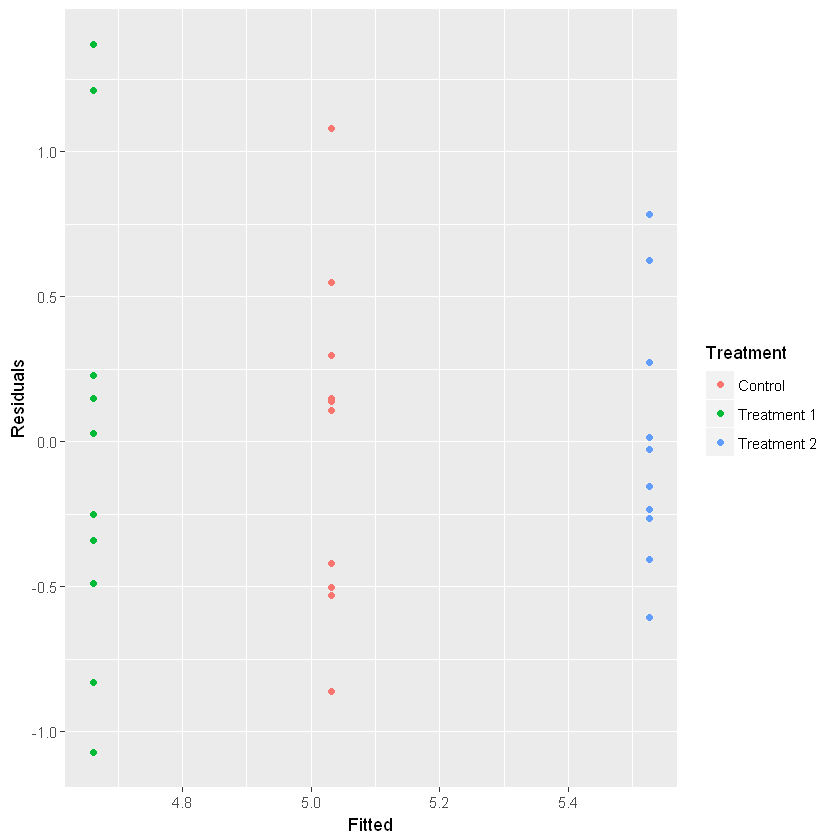

In [19]:
ggplot(plant.mod, aes(Fitted, Residuals, colour = Treatment)) + geom_point()

In [ ]:
#ANOVA 2-WAY

In [20]:
delivery.df = data.frame(
  Service = c(rep("Carrier 1", 15), rep("Carrier 2", 15),
    rep("Carrier 3", 15)),
  Destination = c(rep(c("Office 1", "Office 2", "Office 3",
    "Office 4", "Office 5"), 9)),
  Time = c(15.23, 14.32, 14.77, 15.12, 14.05,
  15.48, 14.13, 14.46, 15.62, 14.23, 15.19, 14.67, 14.48, 15.34, 14.22,
  16.66, 16.27, 16.35, 16.93, 15.05, 16.98, 16.43, 15.95, 16.73, 15.62,
  16.53, 16.26, 15.69, 16.97, 15.37, 17.12, 16.65, 15.73, 17.77, 15.52,
  16.15, 16.86, 15.18, 17.96, 15.26, 16.36, 16.44, 14.82, 17.62, 15.04)
)

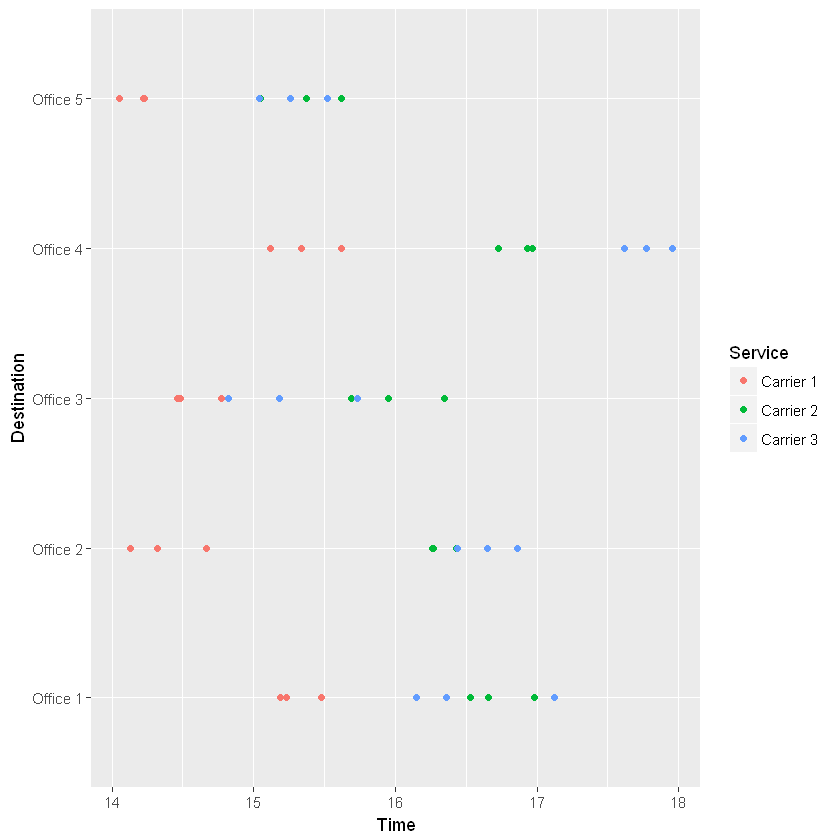

In [21]:
ggplot(delivery.df, aes(Time, Destination, colour = Service)) + geom_point()

In [22]:
#TO FIT THE TWO-WAY ANOVA MODEL
delivery.mod1 = aov(Time ~ Destination*Service, data = delivery.df)
#the * symbol allows for 2-way interactions between destination and service, and 
#instructs the analysis to consider the effects of both Destination and Service.

In [23]:
summary(delivery.mod1)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
Destination          4 17.542   4.385  61.155 5.41e-14 ***
Service              2 23.171  11.585 161.560  < 2e-16 ***
Destination:Service  8  4.189   0.524   7.302 2.36e-05 ***
Residuals           30  2.151   0.072                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
#This shows that there are difference between the 3 delivery options.
#Next stemp is to investigate our assumptions further

In [24]:
delivery.res = delivery.df
delivery.res$M1.Fit = fitted(delivery.mod1)
delivery.res$M1.Resid = resid(delivery.mod1)

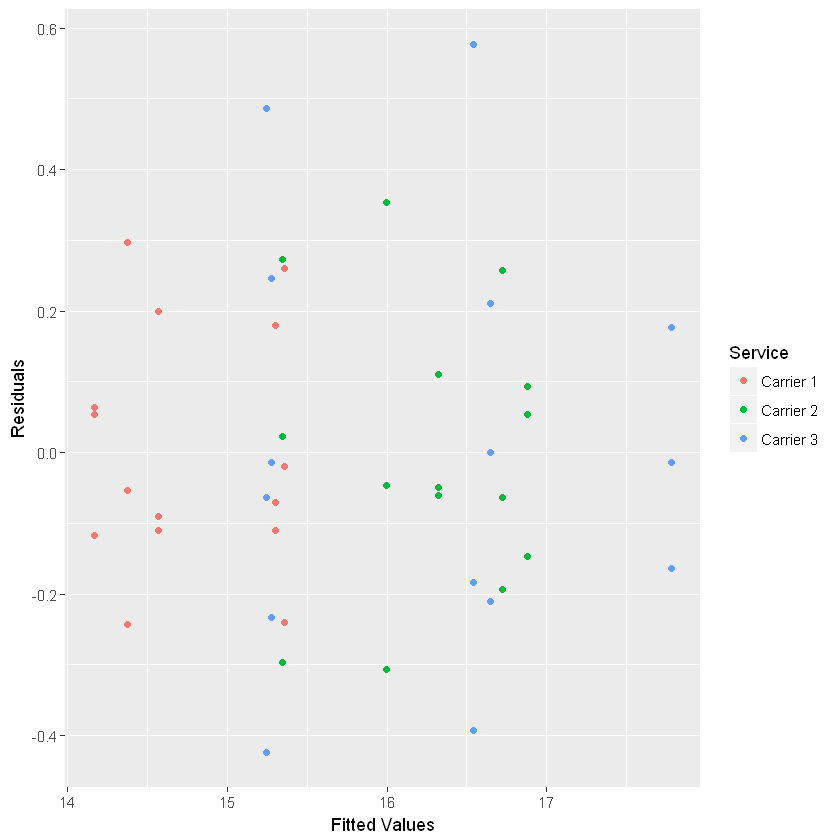

In [25]:
ggplot(delivery.res, aes(M1.Fit, M1.Resid, colour = Service)) + geom_point() +
  xlab("Fitted Values") + ylab("Residuals")

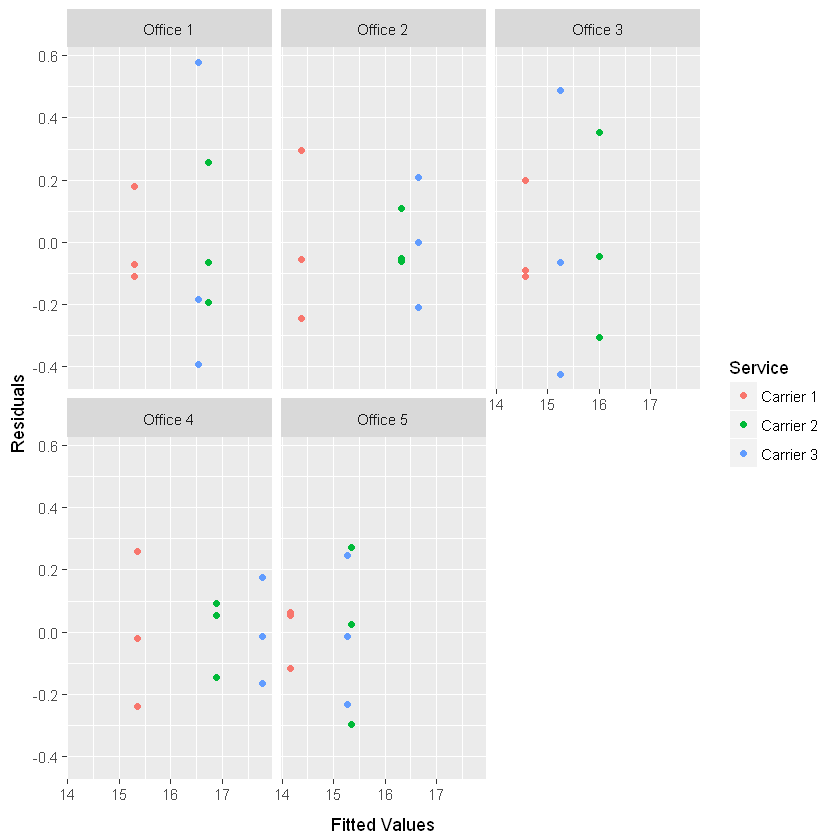

In [26]:
ggplot(delivery.res, aes(M1.Fit, M1.Resid, colour = Service)) +
  geom_point() + xlab("Fitted Values") + ylab("Residuals") +
  facet_wrap( ~ Destination)

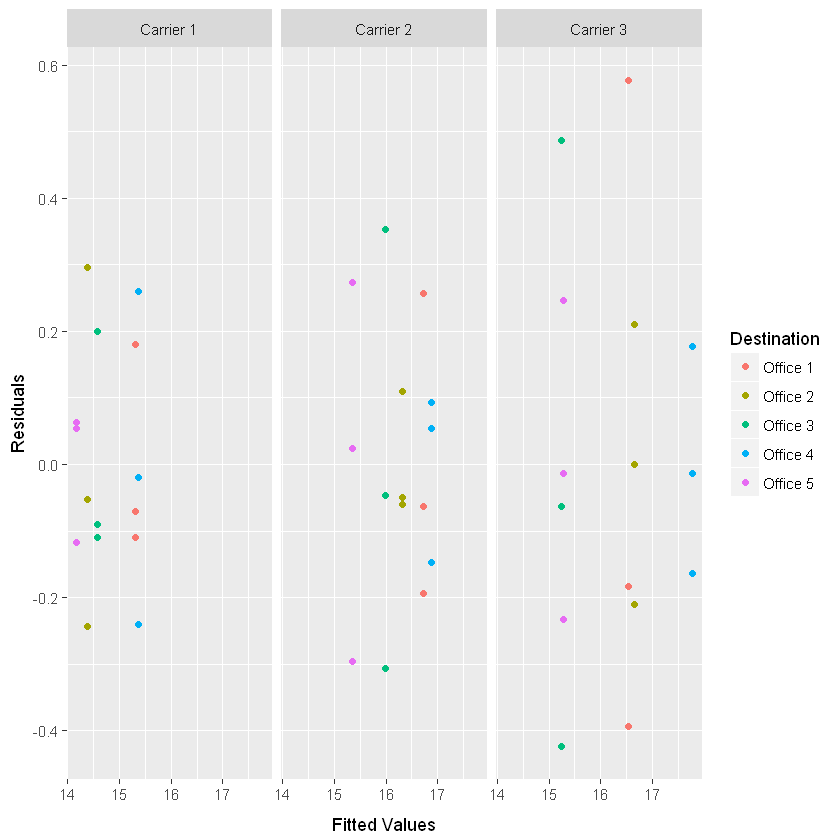

In [27]:
ggplot(delivery.res, aes(M1.Fit, M1.Resid, colour = Destination)) +
  geom_point() + xlab("Fitted Values") + ylab("Residuals") +
  facet_wrap( ~ Service)

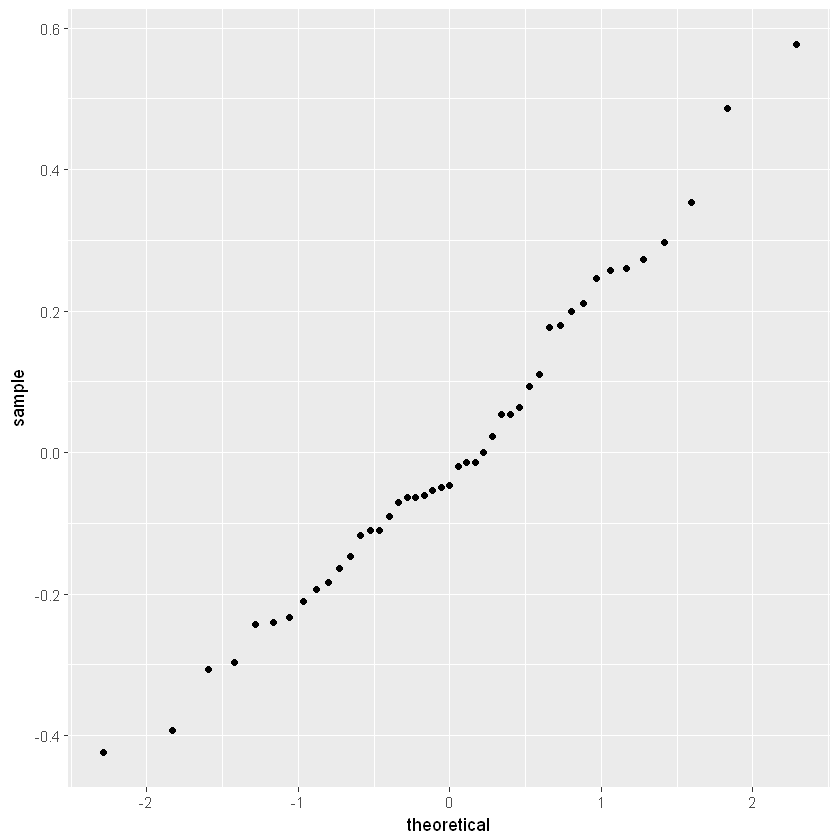

In [28]:
ggplot(delivery.res, aes(sample = M1.Resid)) + stat_qq()

In [29]:
TukeyHSD(delivery.mod1, which = "Service")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Time ~ Destination * Service, data = delivery.df)

$Service
                        diff        lwr       upr     p adj
Carrier 2-Carrier 1 1.498667  1.2576092 1.7397241 0.0000000
Carrier 3-Carrier 1 1.544667  1.3036092 1.7857241 0.0000000
Carrier 3-Carrier 2 0.046000 -0.1950575 0.2870575 0.8856246


In [ ]:
#Clearly from p adj values, Carrier 1 is significantly different from 2 and 3.

In [30]:
delivery.hsd = data.frame(TukeyHSD(delivery.mod1, which = "Service")$Service)
delivery.hsd$Comparison = row.names(delivery.hsd)

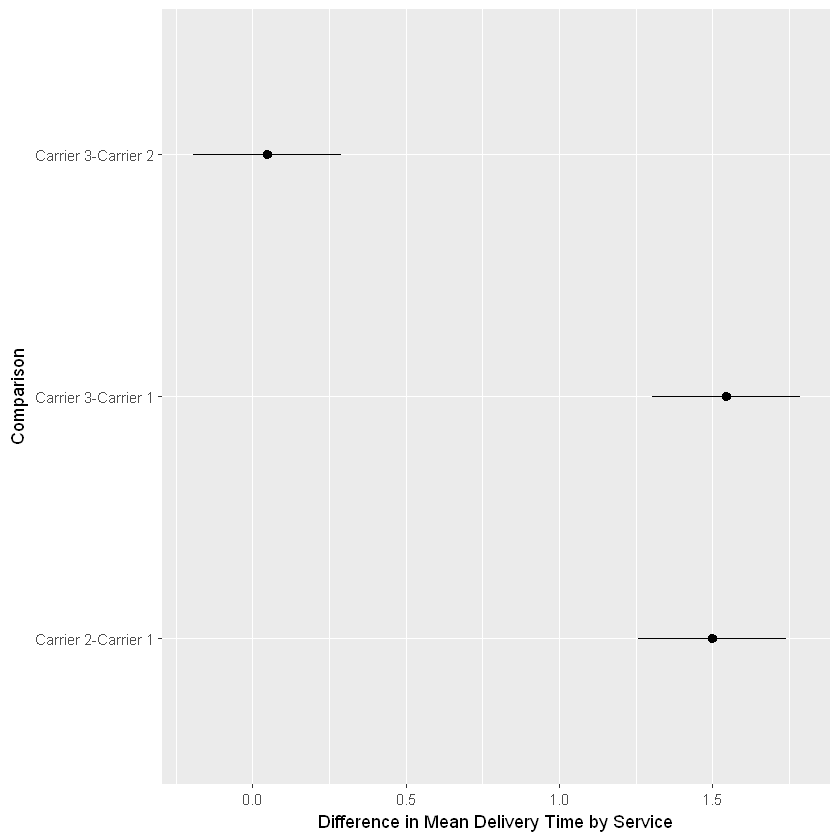

In [31]:
ggplot(delivery.hsd, aes(Comparison, y = diff, ymin = lwr, ymax = upr)) +
  geom_pointrange() + ylab("Difference in Mean Delivery Time by Service") +
  coord_flip()